# Aula 05 - Exemplos

In [2]:
import pandas as pd

## Trabalho X Vestibular

In [3]:
dt = pd.DataFrame([5, 6, 1, 4, 2, 2], index = ["não,1", "não,2", "não,3", "sim,1", "sim,2", "sim,3"], columns = ["(X,Y), Freq"])
dt.loc["Soma"] = dt.sum(axis = 0)
dt

,"(X,Y), Freq"
"não,1",5
"não,2",6
"não,3",1
"sim,1",4
"sim,2",2
"sim,3",2
Soma,20


In [4]:
data = [[5, 6, 1],
        [4, 2, 2]]
dt_dupla = pd.DataFrame(data, index = ["não", "sim"], columns = [1, 2, 3])
dt_dupla.index.name = "X/Y"
dt_dupla["Soma"] = dt_dupla.sum(axis = 1)
dt_dupla.loc["Soma"] = dt_dupla.sum(axis = 0)
dt_dupla

,1,2,3,Soma
X/Y,,,,
não,5,6,1,12
sim,4,2,2,8
Soma,9,8,3,20


In [5]:
dt_marg_x = pd.DataFrame(columns = ["não", "sim"])
dt_marg_x.loc[0] = dt_dupla.sum(axis = 1)
dt_marg_x["Soma"] = int(dt_marg_x.sum(axis = 1))
dt_marg_x

,não,sim,Soma
0,24,16,40


In [6]:
dt_marg_y = pd.DataFrame(columns = [1, 2, 3, "Soma"])
dt_marg_y.loc[0] = dt_dupla[0:2].sum(axis = 0)
dt_marg_y

,1,2,3,Soma
0,9,8,3,20


## Internações X crises

In [7]:
data = [[84, 21, 8, 2, 0],
        [20, 59, 35, 14, 2],
        [6, 11, 43, 28, 12]]
dt = pd.DataFrame(data)
dt.index.name = "I/C"
dt

,0,1,2,3,4
I/C,,,,,
0,84,21,8,2,0
1,20,59,35,14,2
2,6,11,43,28,12


In [8]:
dt_marg_I = pd.DataFrame(columns = [0, 1, 2])
dt_marg_I.loc[0] = dt.sum(axis = 1)
dt_marg_I["Soma"] = int(dt_marg_I.sum(axis = 1))
dt_marg_I

,0,1,2,Soma
0,115,130,100,345


In [9]:
dt_marg_C = pd.DataFrame(columns = [0, 1, 2, 3, 4])
dt_marg_C.loc[0] = dt.sum(axis = 0)
dt_marg_C["Soma"] = int(dt_marg_C.sum(axis = 1))
dt_marg_C

,0,1,2,3,4,Soma
0,110,91,86,44,14,345


## Encomendas

In [10]:
data = [["0,1 X 0,2", 160, 0],
        ["0,9 X 0,2", 180, 10],
        ["0,1 X 0,8", 180, 10],
        ["0,9 X 0,8", 200, 20]]
dt = pd.DataFrame(data, index = ["A1 A2", "A1c A2", "A1 A2c", "A1c A2c"], columns = ["Probabilidade", "X", "Y"])
dt.index.name = "Eventos"
dt

,Probabilidade,X,Y
Eventos,,,
A1 A2,"0,1 X 0,2",160,0
A1c A2,"0,9 X 0,2",180,10
A1 A2c,"0,1 X 0,8",180,10
A1c A2c,"0,9 X 0,8",200,20


In [11]:

data = [0.02, 0.26, 0.72]
dt_conj = pd.DataFrame(data, index = ["(160, 0)", "(180, 10)", "(200, 20)"], columns = ["p(x, y)"])
dt_conj.index.name = "(X,Y)"
dt_conj

,"p(x, y)"
"(X,Y)",
"(160, 0)",0.02
"(180, 10)",0.26
"(200, 20)",0.72


## Região e sub-regiões

In [12]:
data = [[0, 0, 0, 0, 1, 2, 1, 2, 2, 0],
        [1, 2, 1, 0, 1, 0, 0, 1, 2, 2]]
dt = pd.DataFrame(data, index = ["X", "Y"], columns = [i+1 for i in range(10)])
dt.index.name = "Sub-região"
dt

,1,2,3,4,5,6,7,8,9,10
Sub-região,,,,,,,,,,
X,0,0,0,0,1,2,1,2,2,0
Y,1,2,1,0,1,0,0,1,2,2


In [13]:
dt_freq = dt.copy()
dt_freq.loc["X"] = dt.loc["X"] / dt.loc["X"].sum()
dt_freq.loc["Y"] = dt.loc["Y"] / dt.loc["Y"].sum()
dt_freq

,1,2,3,4,5,6,7,8,9,10
Sub-região,,,,,,,,,,
X,0.0,0.0,0.0,0.0,0.125,0.25,0.125,0.25,0.25,0.0
Y,0.1,0.2,0.1,0.0,0.100,0.00,0.000,0.10,0.20,0.2


In [14]:
freq_X = dt.loc["X"].value_counts(sort = False, normalize = True)
freq_X

0    0.5
1    0.2
2    0.3
Name: X, dtype: float64

In [15]:
freq_Y = dt.loc["Y"].value_counts(sort = False, normalize = True)
freq_Y

0    0.3
1    0.4
2    0.3
Name: Y, dtype: float64

In [16]:
data = [freq_X[0] * freq_Y[0], freq_X[0] * freq_Y[1], freq_X[0] * freq_Y[2], freq_X[1] * freq_Y[0],
        freq_X[1] * freq_Y[1], freq_X[1] * freq_Y[2], freq_X[2] * freq_Y[0], freq_X[2] * freq_Y[1], freq_X[2] * freq_Y[2]]
dt_conj = pd.DataFrame(data, columns = ["p(x, y)"], index = ['(0,0)', '(0,1)', '(0,2)', '(1,0)', '(1,1)', '(1,2)',
                                                             '(2,0)', '(2,1)', '(2,2)'])
dt_conj.columns.name = "(X,Y)"
dt_conj.round(1)

"(X,Y)","p(x, y)"
"(0,0)",0.2
"(0,1)",0.2
"(0,2)",0.2
"(1,0)",0.1
"(1,1)",0.1
"(1,2)",0.1
"(2,0)",0.1
"(2,1)",0.1
"(2,2)",0.1


In [17]:
dt_dupla = pd.DataFrame([data[0:3], data[3:6], data[6:9]]).round(1)
dt_dupla.columns.name = "X/Y"
dt_dupla

X/Y,0,1,2
0,0.2,0.2,0.2
1,0.1,0.1,0.1
2,0.1,0.1,0.1


In [18]:
dt_marg = dt_dupla.copy()
dt_marg.loc["P(Y=y)"] = dt_dupla.sum(axis = 0)
dt_marg["P(X=x)"] = dt_dupla.sum(axis = 1)
dt_marg.iloc[3,3] = 1
dt_marg

X/Y,0,1,2,P(X=x)
0,0.2,0.2,0.2,0.6
1,0.1,0.1,0.1,0.3
2,0.1,0.1,0.1,0.3
P(Y=y),0.4,0.4,0.4,1.0


In [19]:
dt_marg_X = pd.DataFrame(dt_dupla.sum(axis = 1)).transpose()
dt_marg_X

,0,1,2
0,0.6,0.3,0.3


In [20]:
dt_marg_Y = pd.DataFrame(dt_dupla.sum(axis = 0)).transpose()
dt_marg_Y

X/Y,0,1,2
0,0.4,0.4,0.4


## Anos para completar o ensino fundamental e o médio

In [21]:
dt = pd.DataFrame()
dt["p(f,m)"] = [0.30, 0.10, 0.10, 0.20, 0.05, 0.10, 0.10, 0.05]
dt["T"] = [12, 13, 14, 13, 14, 15, 15, 16]
dt.columns.name = "(F,M)"
dt.loc["Soma"] = [1, 16]
dt

"(F,M)","p(f,m)",T
0,0.30,12
1,0.10,13
2,0.10,14
3,0.20,13
4,0.05,14
5,0.10,15
6,0.10,15
7,0.05,16
Soma,1.00,16


In [22]:
dt_T = pd.DataFrame([0.3, 0.3, 0.15, 0.2, 0.05], index = [12, 13, 14, 15, 16], columns = ["P(T)"])
dt_T.columns.name = "T"
dt_T

T,P(T)
12,0.30
13,0.30
14,0.15
15,0.20
16,0.05


## Desempenho de alunos

In [23]:
dt = pd.DataFrame()
dt["I"] = [7,7,7,7,8,8,8,8,8,8,8,9,9,9,10]
dt["P"] = [8,6,8,9,8,6,9,7,7,6,7,8,9,8,8]
dt["M"] = [5,6,7,5,5,5,6,4,7,6,5,5,6,5,5]
dt

,I,P,M
0,7,8,5
1,7,6,6
2,7,8,7
3,7,9,5
4,8,8,5
5,8,6,5
6,8,9,6
7,8,7,4
8,8,7,7
9,8,6,6


In [24]:
data = [[1, 0, 2, 1],
        [2, 3, 1, 1],
        [0, 0, 2, 1],
        [0, 0, 1, 0]]
dt_IP = pd.DataFrame(data, index = [7, 8, 9, 10], columns = [6, 7, 8, 9])
dt_IP.columns.name = "I/P"
dt_IP

I/P,6,7,8,9
7,1,0,2,1
8,2,3,1,1
9,0,0,2,1
10,0,0,1,0


In [25]:
data = [[0, 1, 2, 0],
        [1, 1, 0, 1],
        [0, 5, 0, 1],
        [0, 1, 2, 0]]
dt_PM = pd.DataFrame(data, index = [6, 7, 8, 9], columns = [4, 5, 6, 7])
dt_PM.columns.name = "P/M"
dt_PM

P/M,4,5,6,7
6,0,1,2,0
7,1,1,0,1
8,0,5,0,1
9,0,1,2,0


In [26]:
data = [[0, 2, 1, 1],
        [1, 3, 2, 1],
        [0, 2, 1, 0],
        [0, 1, 0, 0]]
dt_IM = pd.DataFrame(data, index = [7, 8, 9, 10], columns = [4, 5, 6, 7])
dt_IM.columns.name = "I/M"
dt_IM

I/M,4,5,6,7
7,0,2,1,1
8,1,3,2,1
9,0,2,1,0
10,0,1,0,0


Text(0, 0.5, 'Inglês')

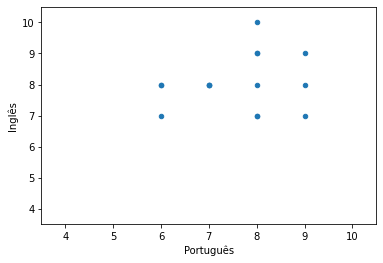

In [27]:
plot = dt.plot.scatter(x = "P", y = "I")
plot.set_xlim(3.5, 10.5)
plot.set_xlabel("Português")
plot.set_ylim(3.5, 10.5)
plot.set_ylabel("Inglês")

Text(0, 0.5, 'Inglês')

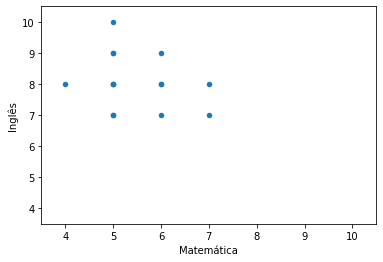

In [28]:
plot = dt.plot.scatter(x = "M", y = "I")
plot.set_xlim(3.5, 10.5)
plot.set_xlabel("Matemática")
plot.set_ylim(3.5, 10.5)
plot.set_ylabel("Inglês")

Text(0, 0.5, 'Português')

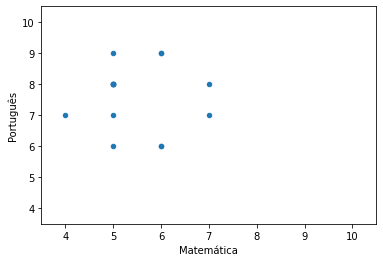

In [29]:
plot = dt.plot.scatter(x = "M", y = "P")
plot.set_xlim(3.5, 10.5)
plot.set_xlabel("Matemática")
plot.set_ylim(3.5, 10.5)
plot.set_ylabel("Português")

## Clínica médica

In [30]:
data = [[12, 21, 47],
        [45, 18, 7]]
dt = pd.DataFrame(data, index = ["Sim", "Não"], columns = ["0", "1", "2+"])
dt.columns.name = "U/N"
dt["Total"] = dt.sum(axis = 1)
dt.loc["Total"] = dt.sum(axis = 0)
dt

U/N,0,1,2+,Total
Sim,12,21,47,80
Não,45,18,7,70
Total,57,39,54,150


In [31]:
dt_freq_col = dt.copy()
dt_freq_col["0"] = round((dt_freq_col["0"] / 57) * 100, 2)
dt_freq_col["1"] = round((dt_freq_col["1"] / 39) * 100, 2)
dt_freq_col["2+"] = round((dt_freq_col["2+"] / 54) * 100, 2)
dt_freq_col["Total"] = round((dt_freq_col["Total"] / 150) * 100, 2)
dt_freq_col

U/N,0,1,2+,Total
Sim,21.05,53.85,87.04,53.33
Não,78.95,46.15,12.96,46.67
Total,100.00,100.00,100.00,100.00


## Famílias

In [32]:
data = [[5, 4, 2, 3, 2],
        [2, 8, 6, 4, 1],
        [4, 8, 8, 5, 2],
        [4, 2, 2, 5, 3]]
dt = pd.DataFrame(data, index = [i for i in range(4)], columns = [i for i in range(5)])
dt.columns.name = "T/A"
dt["Soma"] = dt.sum(axis = 1)
dt.loc["Soma"] = dt.sum(axis = 0)
dt

T/A,0,1,2,3,4,Soma
0,5,4,2,3,2,16
1,2,8,6,4,1,21
2,4,8,8,5,2,27
3,4,2,2,5,3,16
Soma,15,22,18,17,8,80


In [33]:
dt_rel = dt.copy()
for i in dt_rel.columns:
  dt_rel[i] = round((dt_rel[i] / dt_rel[i].iloc[-1]) * 100, 1)
dt_rel

T/A,0,1,2,3,4,Soma
0,33.3,18.2,11.1,17.6,25.0,20.0
1,13.3,36.4,33.3,23.5,12.5,26.2
2,26.7,36.4,44.4,29.4,25.0,33.8
3,26.7,9.1,11.1,29.4,37.5,20.0
Soma,100.0,100.0,100.0,100.0,100.0,100.0


In [34]:
dt_marg_T = pd.DataFrame()
dt_marg_T["Freq"] = dt.iloc[:,0:5].sum(axis = 1)
dt_marg_T["Freq. rel"] = dt_marg_T.Freq / dt_marg_T.Freq.loc["Soma"]
dt_marg_T

,Freq,Freq. rel
0,16,0.2000
1,21,0.2625
2,27,0.3375
3,16,0.2000
Soma,80,1.0000


In [35]:
dt_freq_esp = pd.DataFrame()
for i in range(5):
  total_coluna = dt.iloc[4,i]
  dt_freq_esp[i] = [dt_marg_T.iloc[j,1] * total_coluna for j in range(4)]
dt_freq_esp

,0,1,2,3,4
0,3.0000,4.400,3.600,3.4000,1.6
1,3.9375,5.775,4.725,4.4625,2.1
2,5.0625,7.425,6.075,5.7375,2.7
3,3.0000,4.400,3.600,3.4000,1.6


In [36]:
diff = 0
for i in range(4):
  for j in range(5):
    #(dt.iloc[i, j] - dt_freq_esp.iloc[i, j])**2 / dt_freq_esp[i,j]
    diff += (dt.iloc[i, j] - dt_freq_esp.iloc[i, j])**2 / dt_freq_esp.iloc[i,j]
diff

10.491921628359535

## Chuva

In [37]:
import math

In [38]:
dt = pd.DataFrame()
dt["X"] = [120, 140, 122, 150, 115, 190, 130, 118]
dt["Y"] = [40, 46, 45, 37, 25, 54, 33, 30]
dt

,X,Y
0,120,40
1,140,46
2,122,45
3,150,37
4,115,25
5,190,54
6,130,33
7,118,30


<AxesSubplot:xlabel='X', ylabel='Y'>

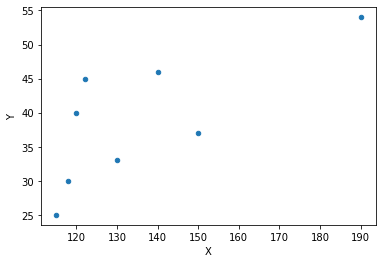

In [39]:
dt.plot.scatter(x = "X", y = "Y")

In [40]:
media_x = dt.X.mean()
media_y = dt.Y.mean()
num = sum([(dt.X[i] - media_x) * (dt.Y[i] - media_y) for i in range(8)])
den = math.sqrt(sum([(dt.X[i] - media_x)**2 for i in range(8)]) * sum([(dt.Y[i] - media_y)**2 for i in range(8)]))
num / den

0.7245955750461284

## Voltando ao exemplo: Anos para completar o ensino fundamental e o médio

In [41]:
data = [[0.30, 0.10, 0.10],
        [0.20, 0.05, 0.10],
        [0.00, 0.10, 0.05]]
dt = pd.DataFrame(data, index = [9, 10, 11], columns = [3, 4, 5])
dt.columns.name = "F/M"
dt["Soma"] = dt.sum(axis = 1)
dt.loc["Soma"] = dt.sum(axis = 0)
dt

F/M,3,4,5,Soma
9,0.3,0.10,0.10,0.50
10,0.2,0.05,0.10,0.35
11,0.0,0.10,0.05,0.15
Soma,0.5,0.25,0.25,1.00


In [42]:
dt = pd.DataFrame()
dt["T"] = [12.0, 13.0, 14.0, 15.0, 16.0]
dt["P(T)"] = [0.3, 0.3, 0.15, 0.2, 0.05]
dt

,T,P(T)
0,12.0,0.30
1,13.0,0.30
2,14.0,0.15
3,15.0,0.20
4,16.0,0.05


In [43]:
esp_F = 9*0.5 + 10*0.35 + 11*0.15
esp_F

9.65

In [44]:
esp_M = 3*0.5 + 4*0.25 + 5*0.25
esp_M

3.75

In [45]:
esp_T = 12.0*0.3 + 13.0*0.3 + 14.0*0.15 + 15.0*0.2 + 16.0*0.05
esp_T

13.4

In [46]:
esp_FM = esp_F + esp_M
esp_FM

13.4

## W e Z

In [47]:
data = [[0.17, 0.00, 0.25],
        [0.00, 0.08, 0.08],
        [0.08, 0.17, 0.17]]
dt = pd.DataFrame(data, index = [-1, 0, 1], columns = [2, 3, 4])
dt.columns.name = "W/Z"
dt["Soma"] = dt.sum(axis = 1)
dt.loc["Soma"] = dt.sum(axis = 0)
dt

W/Z,2,3,4,Soma
-1,0.17,0.00,0.25,0.42
0,0.00,0.08,0.08,0.16
1,0.08,0.17,0.17,0.42
Soma,0.25,0.25,0.50,1.00


In [48]:
esp_W = -1*0.42 + 0*0.16 + 1*0.42
esp_W

0.0

In [49]:
esp_Z = 2*0.25 + 3*0.25 + 4*0.50
esp_Z

3.25

In [50]:
dt_WZ = pd.DataFrame(columns = [-4, -2, 0, 2, 3, 4])
dt_WZ.loc["p(WZ)"] = [0.25, 0.17, 0.17, 0.08, 0.17, 0.17]
dt_WZ

,-4,-2,0,2,3,4
p(WZ),0.25,0.17,0.17,0.08,0.17,0.17


## U e V

In [55]:
data = [
    [0.1, 0, 0, 0, 0, 0.1],
    [0, 0.2, 0, 0.1, 0, 0.3],
    [0, 0, 0.2, 0, 0, 0.2],
    [0, 0.1, 0, 0.2, 0, 0.3],
    [0, 0, 0, 0, 0.1, 0.1],
    [0.1, 0.3, 0.2, 0.3, 0.1, 1]
]
index = [2, 3, 4, 5, 6, "P(V = v)"]
columns = [2, 4, 6, 8, 10, "P(U = u)"]
dt_UV = pd.DataFrame(data, index = index, columns = columns)
dt_UV.columns.name = "U/V"
dt_UV

U/V,2,4,6,8,10,P(U = u)
2,0.1,0.0,0.0,0.0,0.0,0.1
3,0.0,0.2,0.0,0.1,0.0,0.3
4,0.0,0.0,0.2,0.0,0.0,0.2
5,0.0,0.1,0.0,0.2,0.0,0.3
6,0.0,0.0,0.0,0.0,0.1,0.1
P(V = v),0.1,0.3,0.2,0.3,0.1,1.0


In [59]:
marg_U = pd.DataFrame(columns = [2, 3, 4, 5, 6])
marg_U.columns.name = "U"
marg_U.loc["P(U)"] = [0.1, 0.3, 0.2, 0.3, 0.1]
marg_U

U,2,3,4,5,6
P(U),0.1,0.3,0.2,0.3,0.1


In [61]:
marg_V = pd.DataFrame(columns = [2, 4, 6, 8, 10])
marg_V.columns.name = "V"
marg_V.loc["P(V)"] = [0.1, 0.3, 0.2, 0.3, 0.1]
marg_V

V,2,4,6,8,10
P(V),0.1,0.3,0.2,0.3,0.1


In [62]:
marg_UV = pd.DataFrame(columns = [4, 12, 20, 24, 40, 60])
marg_UV.columns.name = "UV"
marg_UV.loc["P(UV)"] = [0.1, 0.2, 0.1, 0.3, 0.2, 0.1]
marg_UV

UV,4,12,20,24,40,60
P(UV),0.1,0.2,0.1,0.3,0.2,0.1
